<a href="https://colab.research.google.com/github/QuiqueCov/Maestria/blob/main/ASL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project Pattern Recognition
The purpose of this project is analyze the asl_dataset from kaggle
https://www.kaggle.com/datasets/ayuraj/asl-dataset

Using a Convolutional Neural Networks,

Here a some courses and documentattion that i took to learn more about the CNNs
https://www.tensorflow.org/tutorials/keras/classification
https://learning.oreilly.com/course/deep-learning-/9781801076272/



In [1]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#Cambiar directorio default de python
import os
os.chdir("/content/gdrive/MyDrive/asl_dataset")

In [4]:
!ls

0  2  4  6  8  a	    b  d  f  h	j  l  n  p  r  t  v  x	z
1  3  5  7  9  asl_dataset  c  e  g  i	k  m  o  q  s  u  w  y


As you can see in the previous code of block, there are folders with each character of asl:
* from 0 to 9
* from a -z


Lets explore our dataset

In [5]:
os.chdir('/content/gdrive/MyDrive/asl_dataset/0')

In [6]:
!pwd

/content/gdrive/MyDrive/asl_dataset/0


In [7]:
!ls

hand1_0_bot_seg_1_cropped.jpeg	  hand2_0_left_seg_1_cropped.jpeg
hand1_0_bot_seg_2_cropped.jpeg	  hand2_0_left_seg_2_cropped.jpeg
hand1_0_bot_seg_3_cropped.jpeg	  hand2_0_left_seg_3_cropped.jpeg
hand1_0_bot_seg_4_cropped.jpeg	  hand2_0_left_seg_4_cropped.jpeg
hand1_0_bot_seg_5_cropped.jpeg	  hand2_0_left_seg_5_cropped.jpeg
hand1_0_dif_seg_1_cropped.jpeg	  hand2_0_right_seg_1_cropped.jpeg
hand1_0_dif_seg_2_cropped.jpeg	  hand2_0_right_seg_2_cropped.jpeg
hand1_0_dif_seg_3_cropped.jpeg	  hand2_0_right_seg_3_cropped.jpeg
hand1_0_dif_seg_4_cropped.jpeg	  hand2_0_right_seg_4_cropped.jpeg
hand1_0_dif_seg_5_cropped.jpeg	  hand2_0_right_seg_5_cropped.jpeg
hand1_0_left_seg_1_cropped.jpeg   hand2_0_top_seg_1_cropped.jpeg
hand1_0_left_seg_2_cropped.jpeg   hand2_0_top_seg_2_cropped.jpeg
hand1_0_left_seg_3_cropped.jpeg   hand2_0_top_seg_3_cropped.jpeg
hand1_0_left_seg_4_cropped.jpeg   hand2_0_top_seg_4_cropped.jpeg
hand1_0_left_seg_5_cropped.jpeg   hand2_0_top_seg_5_cropped.jpeg
hand1_0_right_seg_1_

In [8]:
image = "hand1_0_bot_seg_1_cropped.jpeg"
image_dir = "/content/gdrive/MyDrive/asl_dataset/0"

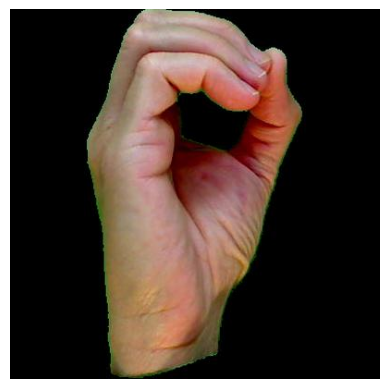

In [9]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img_path = os.path.join(image_dir, image)
img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off')  # No mostrar los ejes
plt.show()

In [10]:
# Directorio que quieres listar
folder_path = '/content/gdrive/MyDrive/asl_dataset/0' # Cambia esto al directorio correcto

# Obtener una lista de todos los archivos en el directorio
files = os.listdir(folder_path)

# Filtrar solo archivos (excluyendo directorios)
files = [f for f in files if os.path.isfile(os.path.join(folder_path, f))]

# Guardar en una variable
all_files = files

# Imprimir la lista de archivos
print(all_files)

['hand1_0_dif_seg_4_cropped.jpeg', 'hand1_0_right_seg_2_cropped.jpeg', 'hand1_0_dif_seg_5_cropped.jpeg', 'hand1_0_left_seg_4_cropped.jpeg', 'hand1_0_left_seg_3_cropped.jpeg', 'hand1_0_right_seg_3_cropped.jpeg', 'hand1_0_right_seg_4_cropped.jpeg', 'hand1_0_bot_seg_3_cropped.jpeg', 'hand1_0_dif_seg_1_cropped.jpeg', 'hand1_0_bot_seg_2_cropped.jpeg', 'hand1_0_bot_seg_5_cropped.jpeg', 'hand1_0_right_seg_1_cropped.jpeg', 'hand1_0_bot_seg_1_cropped.jpeg', 'hand1_0_bot_seg_4_cropped.jpeg', 'hand1_0_top_seg_1_cropped.jpeg', 'hand1_0_left_seg_1_cropped.jpeg', 'hand1_0_dif_seg_3_cropped.jpeg', 'hand1_0_dif_seg_2_cropped.jpeg', 'hand1_0_left_seg_5_cropped.jpeg', 'hand1_0_right_seg_5_cropped.jpeg', 'hand1_0_left_seg_2_cropped.jpeg', 'hand1_0_top_seg_2_cropped.jpeg', 'hand2_0_top_seg_1_cropped.jpeg', 'hand2_0_right_seg_5_cropped.jpeg', 'hand1_0_top_seg_3_cropped.jpeg', 'hand2_0_right_seg_2_cropped.jpeg', 'hand2_0_bot_seg_4_cropped.jpeg', 'hand2_0_left_seg_4_cropped.jpeg', 'hand2_0_top_seg_2_cropped.